<h1 align=center><font size = 6><b>The good, the bad and the data wine</b></font></h1>

<h3 align=center><font size = 3><b>A project by Boris Y. Nedyalkov</b></font></h3>
<h3 align=center><font size = 3>With data from https://archive.ics.uci.edu/ml/datasets/wine+quality</font></h3>

<center> <img src="https://t3.gstatic.com/licensed-image?q=tbn:ANd9GcQUeapVVwUmTQ7Zjx4lvffOfrgGENEh9-rSPwDbov6J_Z9l2yJWxSemTPhUkGLX5vAw" width=700, height=700 /></center> 

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
%matplotlib inline

In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    #ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

In [3]:
df = pd.read_csv("winequality-red.csv")# get the lables out

In [39]:
map_set = {3,4,5,6} # some set - a tuple, list, etc.
df['quality01'] = df['quality'].apply(lambda x: '0' if x in map_set else '1')

In [40]:
df['quality01'].value_counts()

0    1382
1     217
Name: quality01, dtype: int64

In [136]:
y = df['quality01'].values.astype(int)
X = df.drop(['quality','quality01'], axis=1)
# X = df[['citric acid','volatile acidity','chlorides','sulphates','alcohol']]
# X = df[['volatile acidity','sulphates','alcohol']]
X = X.values

In [137]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [138]:
X

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [139]:
# # standardize features 
# X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

# normalize the data
X = preprocessing.normalize(X, norm="l1") # if normalization is needed

In [140]:
X

array([[0.10640776, 0.0100656 , 0.        , ..., 0.05047179, 0.00805248,
        0.13516661],
       [0.06607101, 0.00745417, 0.        , ..., 0.02710606, 0.00576004,
        0.0830123 ],
       [0.08236623, 0.00802543, 0.00042239, ..., 0.03442486, 0.00686385,
        0.10348578],
       ...,
       [0.06667955, 0.00539787, 0.00137593, ..., 0.03619747, 0.00793804,
        0.11642461],
       [0.05887315, 0.00643613, 0.00119742, ..., 0.03562324, 0.00708473,
        0.10178069],
       [0.06937018, 0.00358413, 0.005434  , ..., 0.03919415, 0.00763072,
        0.12717867]])

In [141]:
from sklearn.model_selection import train_test_split
# from sklearn.model_selection import StratifiedShuffleSplit

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4, shuffle=True, stratify = y)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1119, 11) (1119,)
Test set: (480, 11) (480,)


## 1. K nearest neighbours

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
              'weights' : ['uniform','distance'],
              'metric' : ['minkowski','euclidean','manhattan'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2,3]}

KNN = KNeighborsClassifier()

In [ ]:
knn_cv = GridSearchCV(KNN, parameters, cv=3)

knn_cv.fit(X_train, y_train)
predictions = knn_cv.predict(X_test)

In [ ]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

In [ ]:
print("KNN's Train Accuracy: ", knn_cv.score(X_train, y_train))
print("KNN's Test Accuracy: ", knn_cv.score(X_test, y_test))

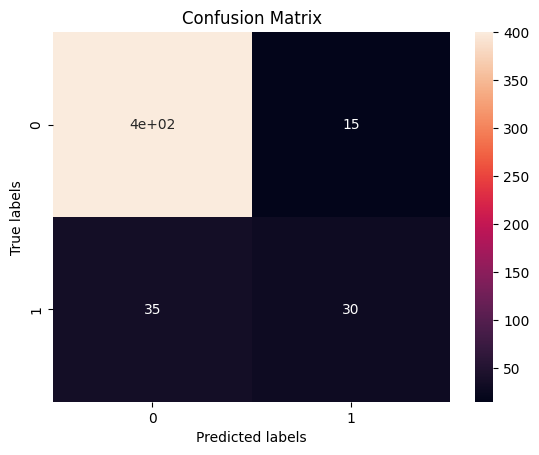

In [59]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       415
           1       0.83      0.23      0.36        65

    accuracy                           0.89       480
   macro avg       0.86      0.61      0.65       480
weighted avg       0.88      0.89      0.86       480



## 2. SVM

In [87]:
from sklearn import svm
from sklearn.metrics import classification_report
import numpy as np

In [112]:
parameters = {'C': [0.1,0.5,1,10,100],
              'gamma':[1,10,20,60,100]}

# parameters = {'C': [0.01,1,100,1000],
#               'gamma':[0, 0.25, 0.5, 1]}

svm = SVC(class_weight='balanced',kernel='rbf')

In [142]:
svm_cv = GridSearchCV(svm, parameters, cv=4, scoring="roc_auc")

svm_cv.fit(X_train, y_train)
predictions = svm_cv.predict(X_test) 

In [143]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 100, 'gamma': 10}
accuracy : 0.8532995809110583


In [144]:
print("SVM's Train Accuracy: ", svm_cv.score(X_train, y_train))
print("SVM's Test Accuracy: ", svm_cv.score(X_test, y_test))

SVM's Train Accuracy:  0.9016763729385511
SVM's Test Accuracy:  0.8700278035217794


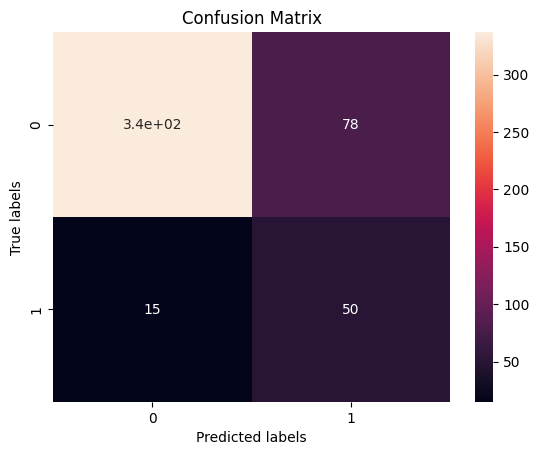

In [145]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

In [146]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88       415
           1       0.39      0.77      0.52        65

    accuracy                           0.81       480
   macro avg       0.67      0.79      0.70       480
weighted avg       0.88      0.81      0.83       480



In [76]:
# for SVM using all the features, for the precision and recall of the fine wines only
precision = {'no_scale_no_norm':0.83,'only_scale':0.76,'only_norm':0.39}
recall = {'no_scale_no_norm':0.23,'only_scale':0.43,'only_norm':0.77}

Text(0, 0.5, 'Recall')

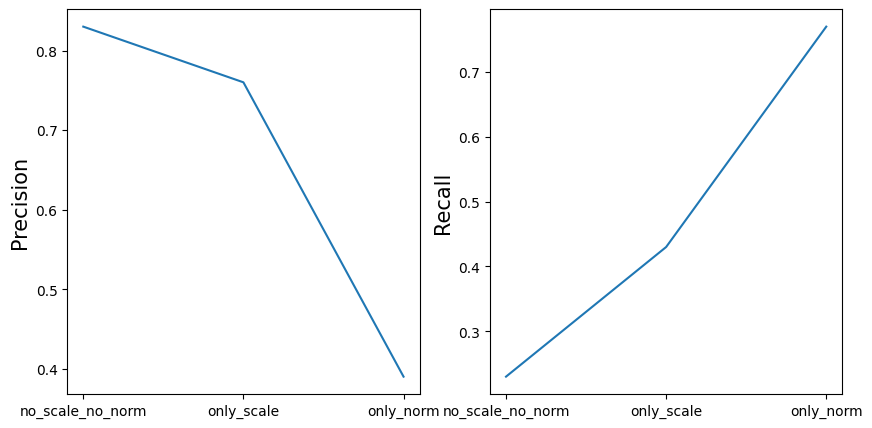

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
plot1 = sns.lineplot(ax=axes[0], data=precision)
plot2 = sns.lineplot(ax=axes[1], data=recall)
plot1.set_ylabel("Precision",fontsize=15)
plot2.set_ylabel("Recall",fontsize=15)

In [77]:
# we would like to pick the high precision

In [134]:
# no let us check the permutation importance of each feature used in the SVM
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(svm_cv, X_test, y_test)

Text(0.5, 0, 'Permutation Importance')

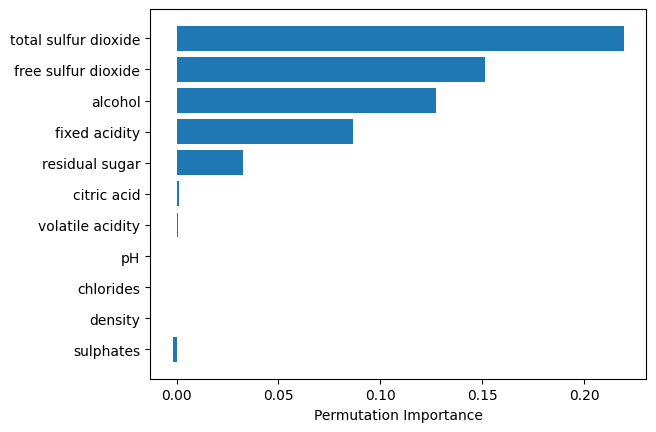

In [135]:
sorted_idx = perm_importance.importances_mean.argsort()
features = df.columns.to_numpy()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

## 3. XGBoost

In [137]:
import xgboost as xgb

In [149]:
xgb_cl = xgb.XGBClassifier()

xgb_cl.fit(X_train, y_train)

yhat = xgb_cl.predict(X_test)

In [150]:
print("XGB's Train Accuracy: ", xgb_cl.score(X_train, y_train))
print("XGB's Test Accuracy: ", xgb_cl.score(X_test, y_test))

XGB's Train Accuracy:  1.0
XGB's Test Accuracy:  0.8958333333333334


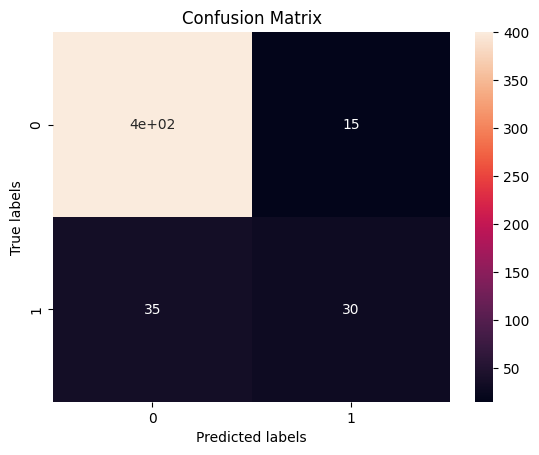

In [151]:
plot_confusion_matrix(y_test,yhat)

### Tuning with hyperparameters

In [160]:
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 0.5, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.5, 0.7, 0.8],
    "colsample_bytree": [0.5, 0.7, 0.9],
}

In [161]:
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# Fit
grid_cv.fit(X_train, y_train)
yhat = grid_cv.predict(X_test) 

In [162]:
print("tuned hpyerparameters :(best parameters) ",grid_cv.best_params_)
print("accuracy :",grid_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'colsample_bytree': 0.5, 'gamma': 0.25, 'learning_rate': 0.05, 'max_depth': 7, 'reg_lambda': 0, 'scale_pos_weight': 5, 'subsample': 0.8}
accuracy : 0.9073224407993555


In [163]:
print("SVM's Train Accuracy: ", grid_cv.score(X_train, y_train))
print("SVM's Test Accuracy: ", grid_cv.score(X_test, y_test))

SVM's Train Accuracy:  1.0
SVM's Test Accuracy:  0.9062094531974051


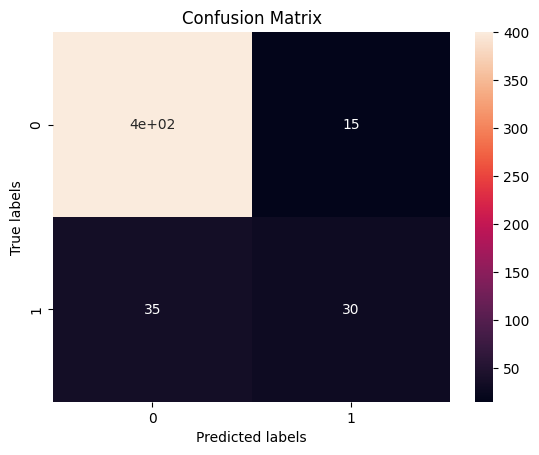

In [164]:
plot_confusion_matrix(y_test,yhat)

In [165]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       415
           1       0.67      0.46      0.55        65

    accuracy                           0.90       480
   macro avg       0.79      0.71      0.74       480
weighted avg       0.89      0.90      0.89       480

